In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
import string

# 1: Load and Preprocess the Data

 ## (A) Load the dataset



Reads the dataset from the CSV file into a Pandas DataFrame

In [ ]:
df = pd.read_csv("new_data.csv")

<ipython-input-2-4febe8e76352>:1: DtypeWarning: Columns (8,10,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("new_data.csv")


In [ ]:
df

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Kindle,NaN,NaN,Adapter,NaN,NaN,NaN,NaN,NaN,NaN
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,very fast,NaN,NaN,truman,NaN,NaN,NaN,NaN,NaN,NaN
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,NaN,NaN,NaN,NaN,NaN,NaN
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Good!!!,NaN,NaN,Shacks,NaN,NaN,NaN,NaN,NaN,NaN
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Fantastic Tablet for kids,NaN,NaN,explore42,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67987,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,2016-12-07T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",...,Xmas gift,NaN,NaN,Mom2twinsplus1,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,Electronics,https://www.upccodesearch.com/images/barcode/0...,53-004485,http://reviews.bestbuy.com/3545/5620410/review...
67988,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,2017-01-20T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",...,yes it is a great tablet.,NaN,NaN,fireman21,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,Electronics,https://www.upccodesearch.com/images/barcode/0...,53-004485,http://reviews.bestbuy.com/3545/5620410/review...
67989,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,2017-01-30T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",...,You get a lot for the price!,NaN,NaN,suzannalicious,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,Electronics,https://www.upccodesearch.com/images/barcode/0...,53-004485,http://reviews.bestbuy.com/3545/5620410/review...
67990,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,2017-02-17T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",...,You get the entire World for less than $100!,NaN,NaN,SandyJ,2017-03-06T14:59:43Z,

In [ ]:
 # Remove rows from a DataFrame df that contain missing values
df.dropna(subset=['reviews.text', 'categories', 'name'], inplace=True)

In [ ]:
# Specify which columns to keep
df = df[['reviews.text', 'categories', 'name']]

 ## (B) Select relevant columns and clean the data

In [ ]:
# # Rename columns to make it clearer what each column represents
df = df.rename(columns={'reviews.text': 'text', 'categories': 'categories', 'name': 'name'})

In [ ]:
# Create a column containing three columns (categories, names, and texts)

df['combined'] = df['text'] + ' ' + df['categories'] + ' ' + df['name']

In [ ]:
df.drop_duplicates()

,text,categories,name,combined
0,This product so far has not disappointed. My c...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...
...,...,...,...,...
67987,I got 2 of these for my 8 yr old twins. My 11 ...,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",I got 2 of these for my 8 yr old twins. My 11 ...
67988,I bought this for my niece for a Christmas gif...,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",I bought this for my niece for a Christmas gif...
67989,"Very nice for light internet browsing, keeping...","Fire Tablets,Tablets,All Tablets,Amazon Tablet...","Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","Very nice for light internet browsing, keeping..."
67990,This Tablet does absolutely everything I want!...,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",This Tablet does absolutely everything I want!...


In [ ]:
# Delete all columns except user
df = df.dropna(subset=['combined'])


In [ ]:
df.head()

,text,categories,name,combined
0,This product so far has not disappointed. My c...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...


In [ ]:
# Download the unwanted word collection
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Clean up the text in the 'combined' column within a df DataFrame by removing unwanted stopwords and punctuation. Here are the details for each part:
stop_words = set(stopwords.words('arabic'))

def clean_text(text):
    return ' '.join([word for word in text.split() if word not in stop_words and word not in string.punctuation])

df['cleaned_combined'] = df['combined'].apply(clean_text)

## (B) Embedding Product Names

In [ ]:

from sentence_transformers import SentenceTransformer

# Load the form
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Create numerical representations
embeddings = model.encode(df['combined'].tolist())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## (C) KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(embeddings)

# Adding the aggregation results to the data
df['cluster'] = kmeans.labels_

# T-SNE

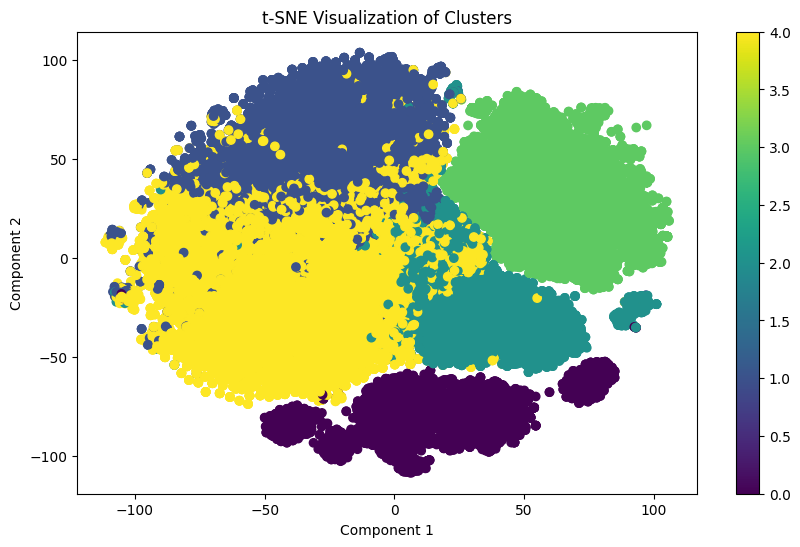

In [ ]:
 # Apply the t-SNE (t-Distributed Stochastic Neighbor Embedding) algorithm to reduce dimensionality on data represented by embeddings.
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(embeddings)

# Plot the results in the form of a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

# Review clusters

Cluster 0:
                                                combined
1264   Love Alexa and all of its features. Love that ...
1333   Bought this for my 5 year old son. He navigate...
1693   Needed an inexpensive and portable Alexa devic...
11908  I haven't paid much attention to the Fire sinc...
14728  I'm your typical middle-aged woman - I don't g...

--------------------------------------------------------------------------------



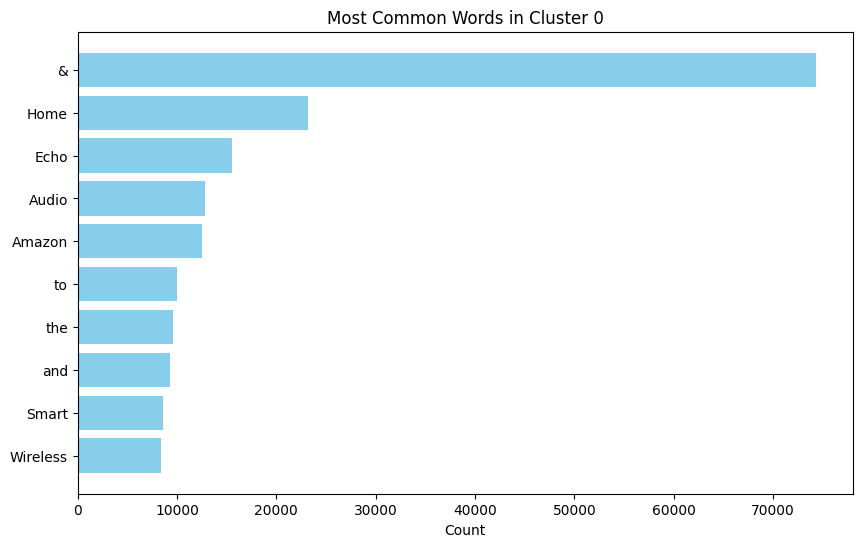

Cluster 1:
                                             combined
23  My grandchildren are home schooled and utilize...
28  I got it for my son. Its user friendly and dur...
58  My daughter likes this tablet to play her onli...
62  My 4 year old Grandson loves his Kindle. He ha...
80  We got this for our 5 year old and this is rea...

--------------------------------------------------------------------------------



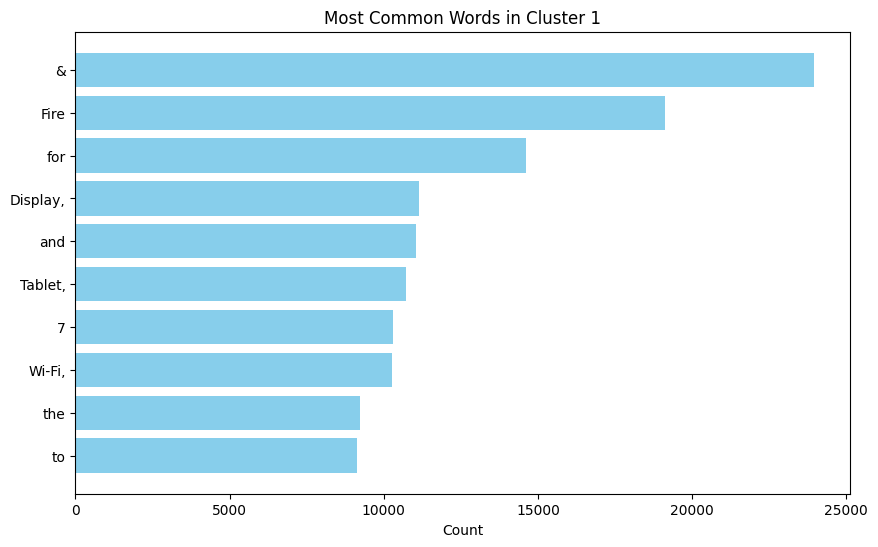

Cluster 2:
                                             combined
8   Great as a device to read books. I like that i...
9   I love ordering books and reading them with th...
15  The kindle is easiest to use, graphics and scr...
21  Preloaded with the reading app from Kindle but...
45  More flexibility than a Kindle and bigger scre...

--------------------------------------------------------------------------------



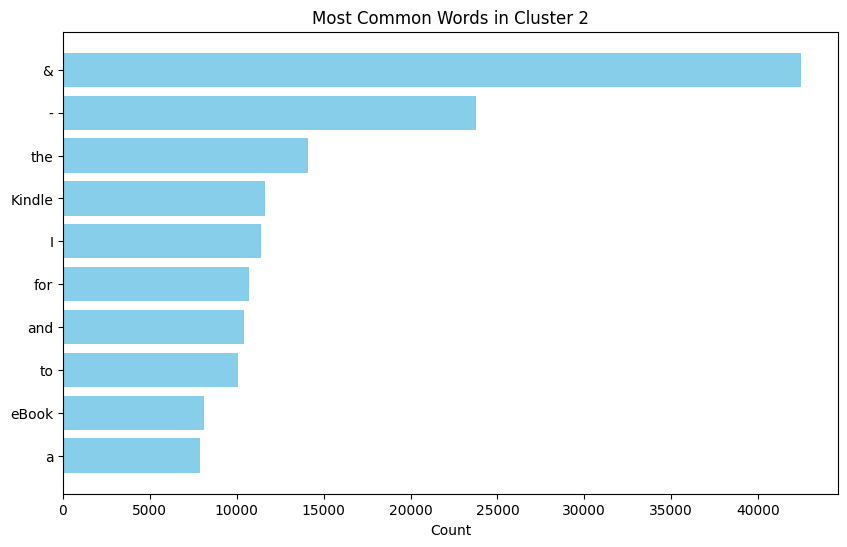

Cluster 3:
                                                combined
39660  I order 3 of them and one of the item is bad q...
39661  Bulk is always the less expensive way to go fo...
39662  Well they are not Duracell but for the price i...
39663  Seem to work as well as name brand batteries a...
39664  These batteries are very long lasting the pric...

--------------------------------------------------------------------------------



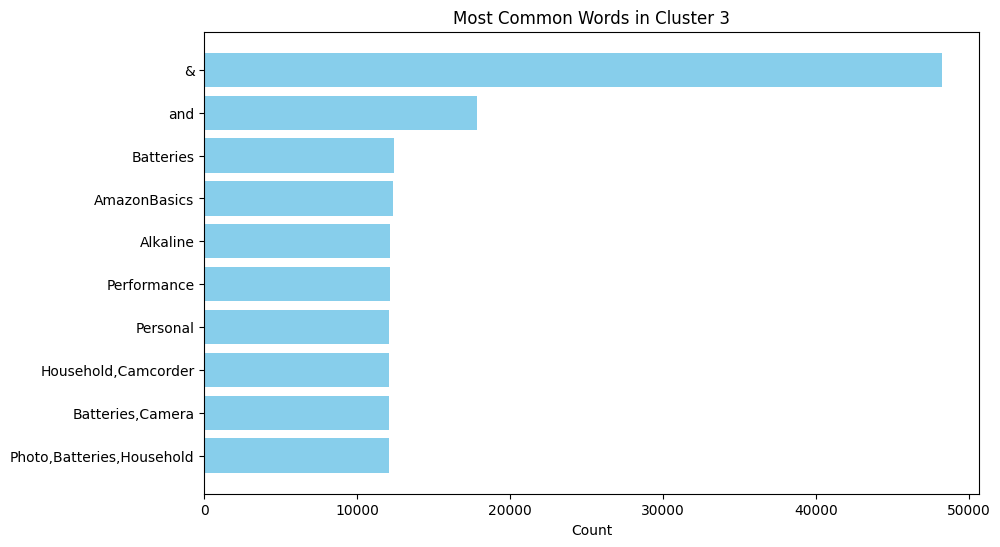

Cluster 4:
                                            combined
0  This product so far has not disappointed. My c...
1  great for beginner or experienced person. Boug...
2  Inexpensive tablet for him to use and learn on...
3  I've had my Fire HD 8 two weeks now and I love...
4  I bought this for my grand daughter when she c...

--------------------------------------------------------------------------------



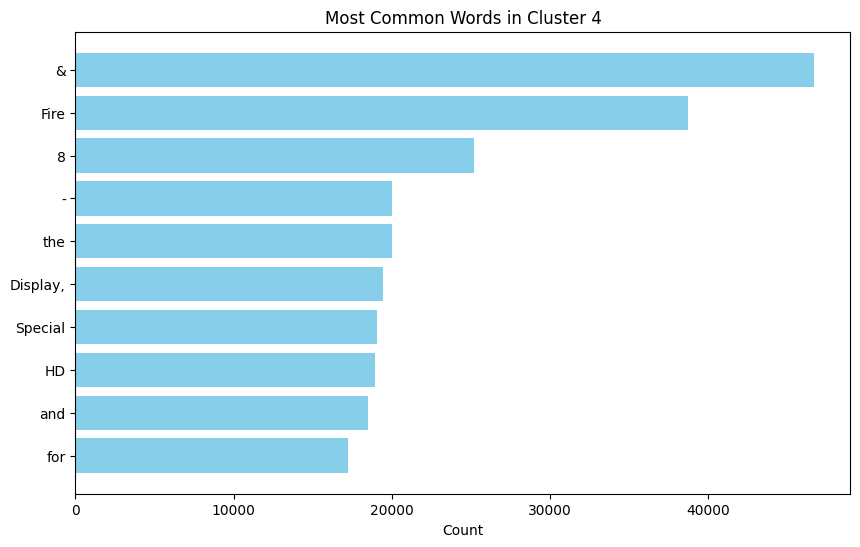

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
# Display specific data from a DataFrame df based on the clusters in it

for cluster_num in range(5):
    print(f"Cluster {cluster_num}:")
    cluster_data = df[df['cluster'] == cluster_num]
    print(cluster_data[['combined']].head(5))
    print("\n" + "-"*80 + "\n")

# Merge all reviews into one text
    all_reviews = " ".join(cluster_data['combined'])
    words = all_reviews.split()

# Calculate word frequency
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)
    words, counts = zip(*most_common_words)

# Draw the diagram
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Count')
    plt.title(f'Most Common Words in Cluster {cluster_num}')
    plt.gca().invert_yaxis()# To make the highest frequency at the top
    plt.show()

In [ ]:
for cluster_num in range(5):
    print(f"Cluster {cluster_num} - Category Distribution:")
    cluster_data = df[df['cluster'] == cluster_num]
    category_counts = cluster_data['categories'].value_counts()
    print(category_counts.head(5))  # Show the 5 most frequent categories in each group
    print("\n" + "-"*80 + "\n")

Cluster 0 - Category Distribution:
categories
Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,Home Security,Kindle Store,Home Automation,Home, Garage & Office,Home,Voice-Enabled Smart Assistants,Virtual Assistant Speakers,Portable Audio & Headphones,Electronics Features,Amazon Device Accessories,iPod, Audio Player Accessories,Home & Furniture Clearance,Consumer Electronics,Smart Home,Surveillance,Home Improvement,Smart Home & Home Automation Devices,Smart Hubs,Home Safety & Security,Voice Assistants,Alarms & Sensors,Amazon Devices,Audio,Holiday Shop                                                                                                                                                                                                                         5946
Compute

# classification clusters

In [ ]:
# Define categories
cluster_names = {
    0: 'General Feedback',
    1: 'Family Use',
    2: 'E-Reading',
    3: 'Battery Reviews',
    4: 'Product Satisfaction'
}

# Add a new column to the DataFrame with short names
df['cluster_name'] = df['cluster'].map(cluster_names)
# Show results
print(df[['cluster', 'cluster_name', 'combined']].head())

   cluster          cluster_name  \
0        4  Product Satisfaction   
1        4  Product Satisfaction   
2        4  Product Satisfaction   
3        4  Product Satisfaction   
4        4  Product Satisfaction   

                                            combined  
0  This product so far has not disappointed. My c...  
1  great for beginner or experienced person. Boug...  
2  Inexpensive tablet for him to use and learn on...  
3  I've had my Fire HD 8 two weeks now and I love...  
4  I bought this for my grand daughter when she c...  


# Top 10 words and stop words

In [ ]:
from collections import Counter
import re
# List of unwanted words
stop_words = set([
    "the", "and", "is", "in", "to", "of", "a", "for", "on", "with",
    "this", "that", "it", "as", "by", "are", "at", "be", "from", "my" , "i",
    "an", "or", "which", "but", "not", "all", "about", "can", "white" , "amazon" , "more" ,
])
# Create a dictionary to store the most common words for each group.
top_words_per_cluster = {}

# Calculate the most common words for each cluster
for cluster in range(5):
# Filter data to get items in the current pool
    cluster_items = df[df['cluster'] == cluster]

# Merge names and categories
    all_text = ' '.join(cluster_items['combined'].tolist())

# Clean up text (remove unnecessary characters and convert to lowercase)
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())

# Divide the text into words
    words = cleaned_text.split()
# Filter words to remove unwanted words
    filtered_words = [word for word in words if word not in stop_words]

# Calculate the frequency
    word_counts = Counter(filtered_words)

# Get the top 10 words
    top_10_words = word_counts.most_common(10)

# Store results in dictionary
    top_words_per_cluster[cluster] = top_10_words

# Show results
for cluster, words in top_words_per_cluster.items():
    print(f"Top 10 words for Cluster {cluster}: {words}")



Top 10 words for Cluster 0: [('home', 24271), ('echo', 17082), ('audio', 12856), ('smart', 9408), ('device', 8951), ('wireless', 8686), ('assistant', 8192), ('player', 7625), ('accessorieshome', 7424), ('hubs', 7407)]
Top 10 words for Cluster 1: [('fire', 19442), ('tablet', 16676), ('kids', 12511), ('gb', 11907), ('display', 11415), ('wifi', 10837), ('case', 7661), ('movies', 7119), ('edition', 6958), ('kidproof', 6818)]
Top 10 words for Cluster 2: [('kindle', 14575), ('wifi', 8564), ('ebook', 8231), ('paperwhite', 7498), ('gb', 7349), ('fire', 5245), ('tabletsall', 5005), ('display', 4770), ('tabletscomputers', 4375), ('black', 4239)]
Top 10 words for Cluster 3: [('batteries', 20114), ('amazonbasics', 12371), ('performance', 12325), ('alkaline', 12296), ('household', 12111), ('baby', 12091), ('count', 12088), ('care', 12086), ('personal', 12077), ('householdcamcorder', 12071)]
Top 10 words for Cluster 4: [('fire', 40469), ('tablet', 33557), ('gb', 21846), ('display', 20857), ('hd', 19

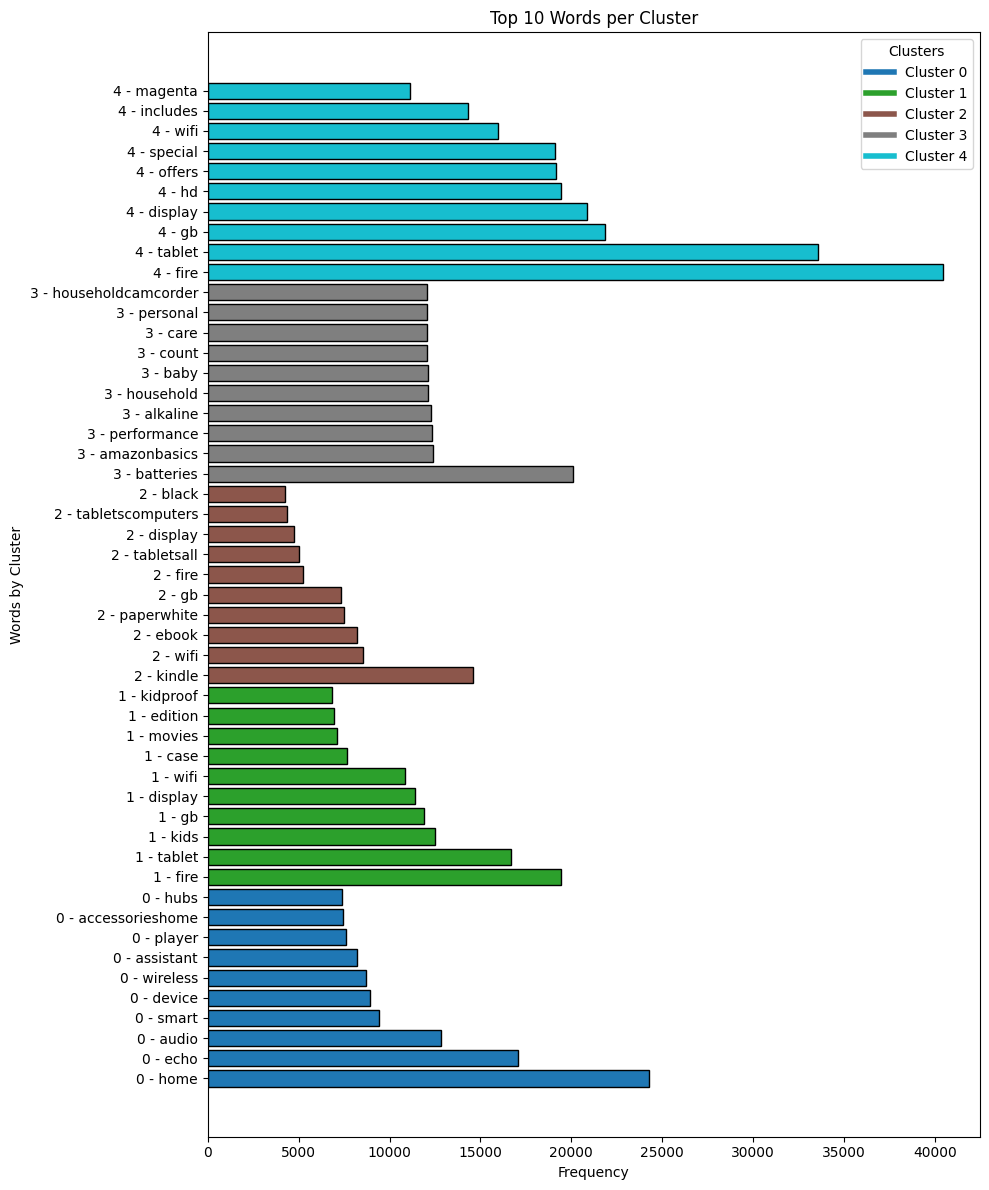

In [ ]:
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt


# Generate distinct colors for each cluster
colors = plt.cm.tab10(np.linspace(0, 1, len(top_words_per_cluster)))

# Prepare data for plotting
words = []
counts = []
color_map = []
cluster_labels = []

for idx, (cluster, word_count_list) in enumerate(top_words_per_cluster.items()):
    for word, count in word_count_list:
        words.append(f"{cluster} - {word}")
        counts.append(count)
        color_map.append(colors[idx])
        cluster_labels.append(cluster)

# Plotting
plt.figure(figsize=(10, 12))
plt.barh(words, counts, color=color_map, edgecolor="black")

# Legend
legend_labels = [f"Cluster {i}" for i in range(len(top_words_per_cluster))]
unique_colors = [colors[i] for i in range(len(top_words_per_cluster))]
custom_legend = [plt.Line2D([0], [0], color=unique_colors[i], lw=4) for i in range(len(unique_colors))]
plt.legend(custom_legend, legend_labels, title="Clusters", loc="upper right")

# Labels and title
plt.ylabel("Words by Cluster")
plt.xlabel("Frequency")
plt.title("Top 10 Words per Cluster")

plt.tight_layout()
plt.show()

# Show similar clusters by 20%

In [ ]:
from collections import defaultdict

# Create a dictionary to store words from each group.
cluster_words = defaultdict(set)

# Store words in each group
for cluster, words in top_words_per_cluster.items():
    cluster_words[cluster] = {word[0] for word in words}

# Calculate the similarity between each group
similarity_results = defaultdict(dict)

for cluster_a in cluster_words:
    for cluster_b in cluster_words:
        if cluster_a != cluster_b:
            intersection = cluster_words[cluster_a].intersection(cluster_words[cluster_b])
            union = cluster_words[cluster_a].union(cluster_words[cluster_b])
            jaccard_index = len(intersection) / len(union) if union else 0
            similarity_results[cluster_a][cluster_b] = {
                'similarity': jaccard_index,
                'common_words': intersection
            }

# Show results
for cluster_a, comparisons in similarity_results.items():
    for cluster_b, result in comparisons.items():
        print(f"Similarity between Cluster {cluster_a} and Cluster {cluster_b}:")
        print(f"  Jaccard Similarity: {result['similarity']:.2f}")
        print(f"  Common Words: {result['common_words']}")
        print("\n" + "-"*80 + "\n")

Similarity between Cluster 0 and Cluster 1:
  Jaccard Similarity: 0.00
  Common Words: set()

--------------------------------------------------------------------------------

Similarity between Cluster 0 and Cluster 2:
  Jaccard Similarity: 0.00
  Common Words: set()

--------------------------------------------------------------------------------

Similarity between Cluster 0 and Cluster 3:
  Jaccard Similarity: 0.00
  Common Words: set()

--------------------------------------------------------------------------------

Similarity between Cluster 0 and Cluster 4:
  Jaccard Similarity: 0.00
  Common Words: set()

--------------------------------------------------------------------------------

Similarity between Cluster 1 and Cluster 0:
  Jaccard Similarity: 0.00
  Common Words: set()

--------------------------------------------------------------------------------

Similarity between Cluster 1 and Cluster 2:
  Jaccard Similarity: 0.25
  Common Words: {'wifi', 'gb', 'display', 'fire'}

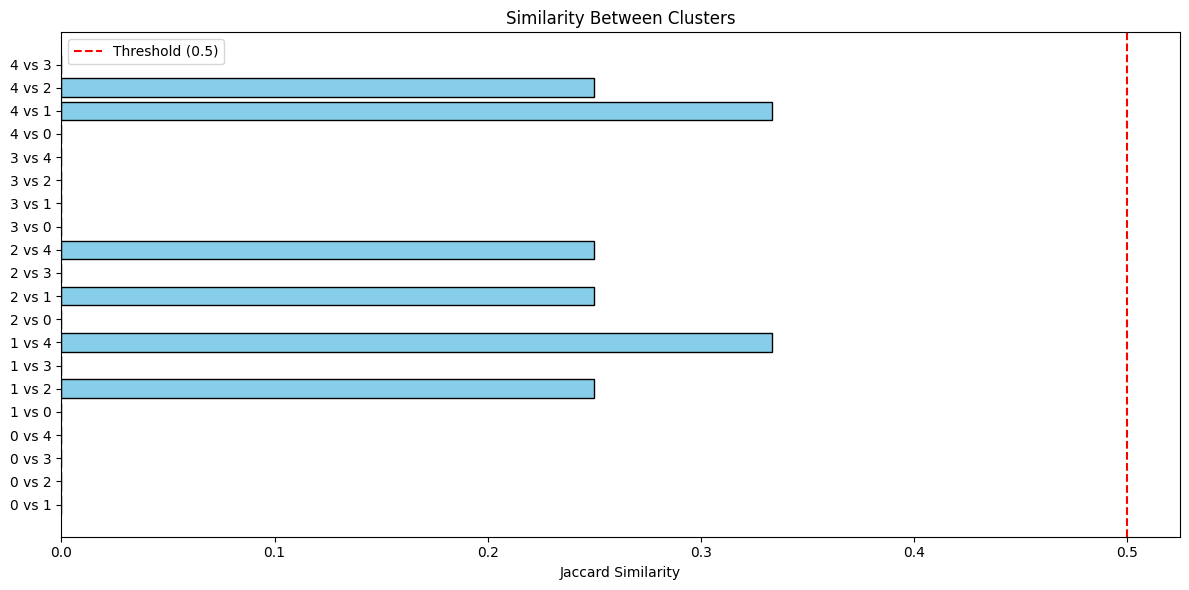

In [ ]:
clusters = list(similarity_results.keys())
similarities = []
labels = []

for cluster_a in clusters:
    for cluster_b in clusters:
        if cluster_a != cluster_b:
            similarities.append(similarity_results[cluster_a][cluster_b]['similarity'])
            labels.append(f"{cluster_a} vs {cluster_b}")

# Draw the diagram
plt.figure(figsize=(12, 6))
plt.barh(labels, similarities, color='skyblue', edgecolor='black')
plt.xlabel('Jaccard Similarity')
plt.title('Similarity Between Clusters')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.tight_layout()
plt.show()

# Rename clusters after Merger

   cluster                                   cluster_name  \
0        4  Product Satisfaction & Family Use & E-Reading   
1        4  Product Satisfaction & Family Use & E-Reading   
2        4  Product Satisfaction & Family Use & E-Reading   
3        4  Product Satisfaction & Family Use & E-Reading   
4        4  Product Satisfaction & Family Use & E-Reading   

                                            combined  
0  This product so far has not disappointed. My c...  
1  great for beginner or experienced person. Boug...  
2  Inexpensive tablet for him to use and learn on...  
3  I've had my Fire HD 8 two weeks now and I love...  
4  I bought this for my grand daughter when she c...  


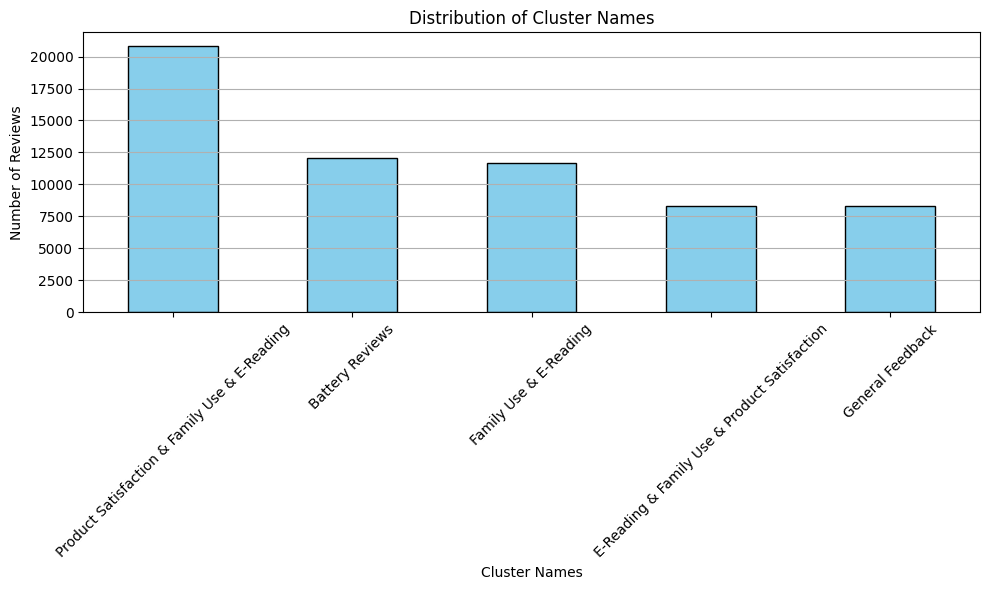

In [ ]:
# Rename groups
cluster_names = {
    0: 'General Feedback',
    1: 'Family Use & E-Reading',
    2: 'E-Reading & Family Use & Product Satisfaction',
    3: 'Battery Reviews',
    4: 'Product Satisfaction & Family Use & E-Reading'
}

# Update cluster_name column based on the new label
df['cluster_name'] = df['cluster'].map(cluster_names)

# Show results
print(df[['cluster', 'cluster_name', 'combined']].head())

# Count the number of elements in each group
cluster_counts = df['cluster_name'].value_counts()

# Draw the diagram
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Drawing settings
plt.title('Distribution of Cluster Names')
plt.xlabel('Cluster Names')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Display the drawing
plt.show()

# Save model

In [ ]:
# # Save model and tokenizer
# from transformers import AutoModelForSequenceClassification
# model = AutoModelForSequenceClassification.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
# model.save_pretrained("sentence-transformers/all-MiniLM-L6-v2")

In [ ]:
import joblib
import os

# Define save path
clustering_path = "models/clustering_model"
os.makedirs(clustering_path, exist_ok=True)

# Save your trained KMeans model
joblib.dump(kmeans, f"{clustering_path}/kmeans_model.pkl")

# Save your cluster name mapping dictionary
joblib.dump(cluster_names, f"{clustering_path}/cluster_names.pkl")

# Save the dataframe with cluster labels
df.to_csv(f"{clustering_path}/clustered_reviews.csv", index=False)

print("✅ Clustering model and data saved.")

✅ Clustering model and data saved.


In [ ]:
import shutil

shutil.make_archive("clustering_model", 'zip', "models/clustering_model")

'/content/clustering_model.zip'

In [ ]:
from google.colab import files

files.download("clustering_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>